<a href="https://colab.research.google.com/github/IwannaBallet/Hi/blob/main/2025_02_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('seoul_real_estate.csv', encoding='cp949')

<ipython-input-1-db69a1dc2b41>:2: DtypeWarning: Columns (7,8,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('seoul_real_estate.csv', encoding='cp949')


In [ ]:
print(df.head())

   접수연도  자치구코드  자치구명  법정동코드 법정동명  지번구분 지번구분명   본번   부번           건물명  ...  \
0  2025  11530   구로구  10600  고척동   1.0    대지  339    0      고척파크푸르지오  ...   
1  2025  11740   강동구  10900  천호동   3.0    블럭  410  100    더샵 강동센트럴시티  ...   
2  2025  11230  동대문구  10800  회기동   1.0    대지   67    3  민족통일MJ캠퍼스경희대  ...   
3  2025  11230  동대문구  10100  신설동   1.0    대지   96   48      신설동역자이르네  ...   
4  2025  11440   마포구  10400  도화동   1.0    대지  550    0            삼성  ...   

   건물면적(㎡) 토지면적(㎡)  평당금액(만원)     층 권리구분  취소일    건축년도  건물용도  신고구분  \
0   59.890     0.0       NaN   9.0  NaN  NaN  2009.0   아파트  중개거래   
1   84.989     0.0       NaN  12.0  분양권  NaN     0.0   아파트  중개거래   
2   23.160     0.0       NaN   8.0  NaN  NaN  2017.0   아파트  중개거래   
3   42.836     0.0       NaN  10.0  분양권  NaN     0.0   아파트  중개거래   
4   84.985     0.0       NaN   1.0  NaN  NaN  1997.0   아파트   직거래   

  신고한 개업공인중개사 시군구명  
0   서울 구로구, 서울 양천구  
1           서울 강동구  
2          서울 동대문구  
3           서울 성동구  
4              NaN  

[

In [ ]:
print(df.columns)

Index(['접수연도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분', '지번구분명', '본번', '부번',
       '건물명', '계약일', '물건금액(만원)', '건물면적(㎡)', '토지면적(㎡)', '평당금액(만원)', '층', '권리구분',
       '취소일', '건축년도', '건물용도', '신고구분', '신고한 개업공인중개사 시군구명'],
      dtype='object')


In [ ]:
#자치구별 TOP5 매물
# User input for filtering by district (e.g., '구로구')
district_name = input("Enter the district name (자치구명): ")

# Filter the DataFrame by '자치구명' and sort by '물건금액' in descending order
filtered_df = df[df['자치구명'] == district_name][['건물명', '물건금액(만원)']].sort_values(by='물건금액(만원)', ascending=False)

# Display the result
print(filtered_df)

Enter the district name (자치구명): 구로구
               건물명    물건금액(만원)
7408           대림2     99,800 
102871      개봉푸르지오     99,800 
100137          현대     99,700 
209670         NaN     99,522 
86819          동아1     99,500 
...            ...         ...
229976     거성빌라11동     10,000 
229816      로제리움2차     10,000 
229815      로제리움2차     10,000 
222859  J팰리스3차(A동)     10,000 
197231         NaN  1,010,793 

[10679 rows x 2 columns]


In [ ]:
print(filtered_df.head(5))

           건물명 물건금액(만원)
7408       대림2  99,800 
102871  개봉푸르지오  99,800 
100137      현대  99,700 
209670     NaN  99,522 
86819      동아1  99,500 


In [ ]:
len(df[df["자치구명"] == "구로구"].iloc[1,:]["물건금액(만원)"])

7

In [ ]:
# 1️⃣ Remove any spaces in column names (if needed)
df.columns = df.columns.str.strip()

# 2️⃣ Create a new column '정리_물건금액(만원)' and copy the original column
df['정리_물건금액(만원)'] = df['물건금액(만원)']

# 3️⃣ Remove NaN values for '정리_물건금액(만원)'
df = df[df['정리_물건금액(만원)'].notna()]

# 4️⃣ Convert '정리_물건금액(만원)' to string first, then clean and convert to float
df['정리_물건금액(만원)'] = df['정리_물건금액(만원)'].astype(str)  # Convert to string for safety
df['정리_물건금액(만원)'] = df['정리_물건금액(만원)'].str.replace(',', '')  # Remove commas if present
df['정리_물건금액(만원)'] = df['정리_물건금액(만원)'].astype(float)  # Convert to float

# 5️⃣ Reset index after filtering
df = df.reset_index(drop=True)

# Check the cleaned data
print(df[['건물명', '물건금액(만원)', '정리_물건금액(만원)']].head())

            건물명  물건금액(만원)  정리_물건금액(만원)
0      고척파크푸르지오   84,000       84000.0
1    더샵 강동센트럴시티  141,368      141368.0
2  민족통일MJ캠퍼스경희대   21,800       21800.0
3      신설동역자이르네   76,050       76050.0
4            삼성  120,000      120000.0


In [ ]:
#자치구별 TOP5 물건금액(만원)
# Convert '건물명' to string (to avoid float conversion issues)
df['건물명'] = df['건물명'].astype(str)

# Fill NaN values in '건물명' with "Unknown"
df['건물명'] = df['건물명'].fillna("Unknown")

# User input for filtering by district (e.g., '구로구')
district_name = input("Enter the district name (자치구명): ")

# Filter the DataFrame by '자치구명' and get the Top 5 most expensive properties
filtered_df = df[df['자치구명'] == district_name][['건물명', '정리_물건금액(만원)']] \
    .sort_values(by='정리_물건금액(만원)', ascending=False) \
    .head(5)

# Identify the indexes of NaN values in '건물명'
nan_indexes = filtered_df[filtered_df['건물명'] == 'nan'].index  # Find NaN rows

# Replace 'nan' values with 'Building 1', 'Building 2', etc.
for i, idx in enumerate(nan_indexes, start=1):
    filtered_df.at[idx, '건물명'] = f"Building {i}"

# Display the modified DataFrame
print(filtered_df)

Enter the district name (자치구명): 구로구
               건물명  정리_물건금액(만원)
140088  Building 1    2050000.0
197231  Building 2    1010793.0
118696  Building 3     600000.0
157716  Building 4     380000.0
175822  Building 5     300500.0


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

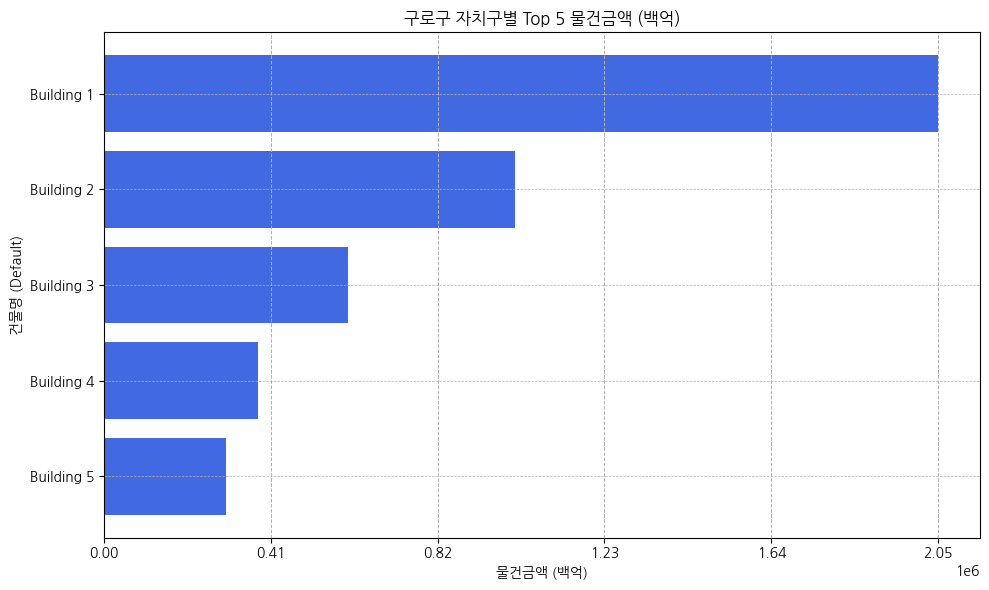

In [ ]:
#자치구별 TOP5 물건금액(백억)-차트
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'NanumGothic'  # Set Korean font for Colab
plt.rcParams['axes.unicode_minus'] = False  # Fix for negative signs in gra

# Plot the horizontal bar chart with sorted data
plt.figure(figsize=(10, 6))
plt.barh(filtered_df['건물명'], filtered_df['정리_물건금액(만원)'], color='royalblue')

# Invert y-axis so the most expensive property is at the top
plt.gca().invert_yaxis()

# 🛠 **Fix: Set X-Axis Ticks to Increase by 0.5 (Show Until 2.5)**
plt.xticks(np.arange(0, 2.6, 0.5))  # Increments of 0.5, up to 2.5


# 🛠 **Fix 1: Add Clear Grid Lines to Y-Axis**
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)  # Dashed grid lines on y-axis

# 🛠 **Fix 2: Adjust X-Axis Tick Labels to Prevent Overlapping**
plt.xticks(np.linspace(0, filtered_df['정리_물건금액(만원)'].max(), 6))  # Spread x-ticks evenly


# Labels and Title
plt.xlabel("물건금액 (백억)")
plt.ylabel("건물명 (Default)")
plt.title(f"{district_name} 자치구별 Top 5 물건금액 (백억)")
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=1)  # Dashed grid lines only on the x-axis
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=1)  # Dotted grid lines only on the y-axis

# 🛠 **Fix 3: Adjust Margins to Avoid Squished X-Axis Labels**
plt.tight_layout()  # Automatically adjusts layout

# Show the chart
plt.show()

In [ ]:
#평당금액(만원)
df['정리_물건금액(만원)'] = pd.to_numeric(df['정리_물건금액(만원)'], errors='coerce')
df['건물면적(㎡)'] = pd.to_numeric(df['건물면적(㎡)'], errors='coerce')

# Create '평당금액' column (Price per square meter)
df['평당금액'] = df['정리_물건금액(만원)'] / df['건물면적(㎡)']

# Check result
print(df[['건물명', '정리_물건금액(만원)', '건물면적(㎡)', '평당금액']].head())


            건물명  정리_물건금액(만원)  건물면적(㎡)         평당금액
0      고척파크푸르지오      84000.0   59.890  1402.571381
1    더샵 강동센트럴시티     141368.0   84.989  1663.368201
2  민족통일MJ캠퍼스경희대      21800.0   23.160   941.278066
3      신설동역자이르네      76050.0   42.836  1775.375852
4            삼성     120000.0   84.985  1412.013885


In [ ]:
print(df['토지면적(㎡)'].dtype)

float64


In [ ]:
#자치구별 TOP5 건물면적(㎡)
# Convert '건물면적(㎡)' to numeric to ensure sorting works
df['건물면적(㎡)'] = pd.to_numeric(df['건물면적(㎡)'], errors='coerce')

# User input for filtering by '자치구명' (district name)
district_name = input("Enter the district name (자치구명): ")

# Filter the DataFrame by '자치구명' and sort by '건물면적(㎡)' in descending order
filtered_building_df = df[df['자치구명'] == district_name][['건물명', '건물면적(㎡)']].sort_values(by='건물면적(㎡)', ascending=False).head(5)

# Identify the indexes of NaN values in '건물명'
nan_indexes = filtered_building_df[filtered_building_df['건물명'] == 'nan'].index  # Find NaN rows

# Replace 'nan' values with 'Building 1', 'Building 2', etc.
for i, idx in enumerate(nan_indexes, start=1):
    filtered_building_df.at[idx, '건물명'] = f"Building {i}"

# Display the modified DataFrame
print(filtered_building_df)

Enter the district name (자치구명): 구로구
               건물명  건물면적(㎡)
197231  Building 1  2332.27
140088  Building 2  2332.27
185512  Building 3   989.24
157716  Building 4   833.39
118696  Building 5   683.97


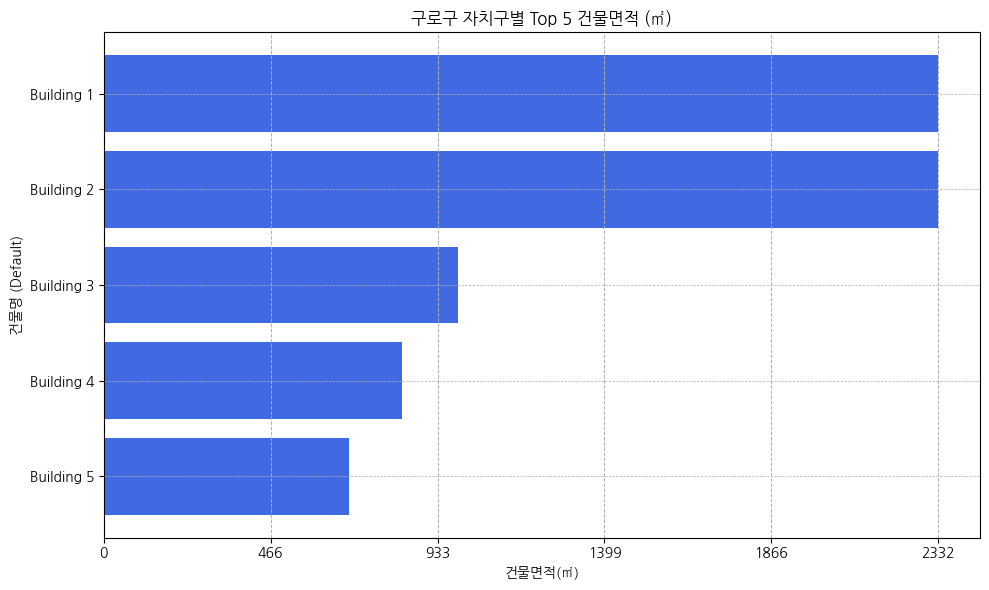

In [ ]:
#자치구별 TOP5 건물면적(㎡)-차트

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'NanumGothic'  # Set Korean font for Colab
plt.rcParams['axes.unicode_minus'] = False  # Fix for negative signs in gra

# Plot the horizontal bar chart with sorted data
plt.figure(figsize=(10, 6))
plt.barh(filtered_building_df['건물명'], filtered_building_df['건물면적(㎡)'], color='royalblue')

# Invert y-axis so the most expensive property is at the top
plt.gca().invert_yaxis()


# 🛠 **Fix 1: Add Clear Grid Lines to Y-Axis**
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)  # Dashed grid lines on y-axis

# 🛠 **Fix 2: Adjust X-Axis Tick Labels to Prevent Overlapping**
plt.xticks(np.linspace(0, filtered_building_df['건물면적(㎡)'].max(), 6))  # Spread x-ticks evenly


# Labels and Title
plt.xlabel("건물면적(㎡)")
plt.ylabel("건물명 (Default)")
plt.title(f"{district_name} 자치구별 Top 5 건물면적 (㎡)")
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=1)  # Dashed grid lines only on the x-axis
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=1)  # Dotted grid lines only on the y-axis

# 🛠 **Fix 3: Adjust Margins to Avoid Squished X-Axis Labels**
plt.tight_layout()  # Automatically adjusts layout

# Show the chart
plt.show()

In [ ]:
#자치구별 TOP5 토지면적(㎡)
# Convert '건물명' to string (to avoid float conversion issues)
df['건물명'] = df['건물명'].astype(str)

# Fill NaN values in '건물명' with "Unknown"
df['건물명'] = df['건물명'].fillna("Unknown")

# User input for filtering by district (e.g., '구로구')
district_name = input("Enter the district name (자치구명): ")

# Filter the DataFrame by '자치구명' and get the Top 5 most expensive properties
filtered_district_df = df[df['자치구명'] == district_name][['건물명', '토지면적(㎡)']] \
    .sort_values(by='토지면적(㎡)', ascending=False) \
    .head(5)


nan_indexes = filtered_district_df[filtered_district_df['건물명'] == 'nan'].index  # Find NaN rows

# Replace 'nan' values with 'Building 1', 'Building 2', etc.
for i, idx in enumerate(nan_indexes, start=1):
    filtered_district_df.at[idx, '건물명'] = f"Building {i}"


# We do not need to identify and replace 'nan' since all '건물명' NaN values have been replaced with "Unknown"
# Display the modified DataFrame
print(filtered_district_df)

Enter the district name (자치구명): 구로구
               건물명  토지면적(㎡)
140088  Building 1   1458.0
197231  Building 2   1458.0
215418  Building 3    546.0
184124  Building 4    365.3
230364  Building 5    353.0


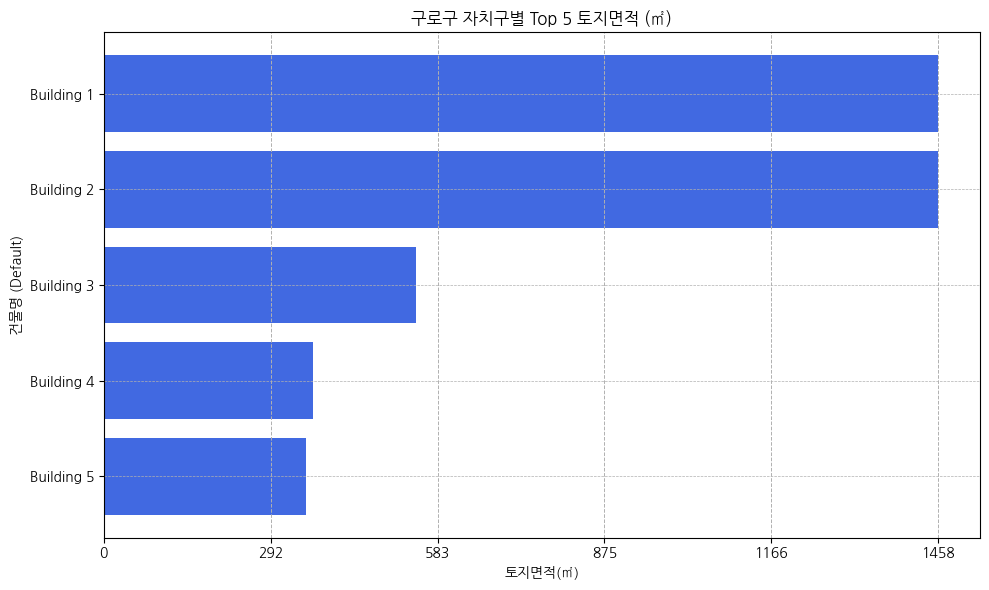

In [ ]:
#자치구별 TOP5 토지면적(㎡)-차트


import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'NanumGothic'  # Set Korean font for Colab
plt.rcParams['axes.unicode_minus'] = False  # Fix for negative signs in graphs

# Plot the horizontal bar chart with sorted data
plt.figure(figsize=(10, 6))
plt.barh(filtered_district_df['건물명'], filtered_district_df['토지면적(㎡)'], color='royalblue')

# Invert y-axis so the most expensive property is at the top
plt.gca().invert_yaxis()

# 🛠 **Fix 1: Add Clear Grid Lines to Y-Axis**
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)  # Dashed grid lines on y-axis

# 🛠 **Fix 2: Adjust X-Axis Tick Labels to Prevent Overlapping**
plt.xticks(np.linspace(0, filtered_district_df['토지면적(㎡)'].max(), 6))  # Spread x-ticks evenly

# Labels and Title
plt.xlabel("토지면적(㎡)")
plt.ylabel("건물명 (Default)")
plt.title(f"{district_name} 자치구별 Top 5 토지면적 (㎡)")
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=1)  # Dashed grid lines only on the x-axis
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=1)  # Dotted grid lines only on the y-axis

# 🛠 **Fix 3: Adjust Margins to Avoid Squished X-Axis Labels**
plt.tight_layout()  # Automatically adjusts layout

# Show the chart
plt.show()


In [ ]:
#자치구별 건물용도(분포)
# User input for filtering by '자치구명' (district name)
district_name = input("Enter the district name (자치구명): ")

# Filter the DataFrame by '자치구명'
filtered_df = df[df['자치구명'] == district_name]

# Calculate percentage distribution of '건물용도'
building_use_distribution = filtered_df['건물용도'].value_counts(normalize=True) * 100

# Display the result
print(building_use_distribution)

Enter the district name (자치구명): 강남구
건물용도
아파트      55.779179
오피스텔     24.078565
연립다세대    16.981895
단독다가구     3.160362
Name: proportion, dtype: float64


Enter the district name (자치구명): 구로구


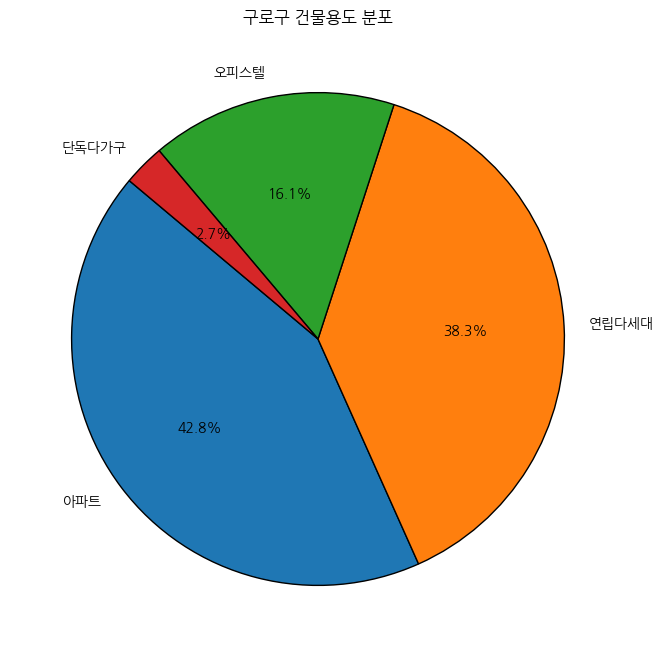

In [ ]:
#자치구별 건물용도(분포)-차트


import pandas as pd
import matplotlib.pyplot as plt

# User input for filtering by '자치구명' (district name)
district_name = input("Enter the district name (자치구명): ").strip()

# Filter the DataFrame by '자치구명'
filtered_df = df[df['자치구명'] == district_name]

# Calculate percentage distribution of '건물용도'
building_use_distribution = filtered_df['건물용도'].value_counts(normalize=True) * 100

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    building_use_distribution,
    labels=building_use_distribution.index,
    autopct='%1.1f%%',  # Show percentage values
    startangle=140,  # Rotate for better visibility
    wedgeprops={'edgecolor': 'black'}  # Add border for clarity
)

plt.title(f"{district_name} 건물용도 분포")
plt.show()


